In [1]:
import torch

### 生成数据集

torch.normal是生成正态分布的一组数的函数

[文档](https://pytorch.org/docs/stable/generated/torch.normal.html#torch-normal)

简要来说，第一个参数为平均值，第二个参数为标准差，第三个参数为形状

torch.matmul是矩阵的叉乘

[文档](https://pytorch.org/docs/stable/generated/torch.matmul.html#torch-matmul)

In [4]:
torch.normal(0,1,(10,2)) 

tensor([[ 0.3221, -1.0872],
        [ 0.3417,  1.0248],
        [ 1.5823,  0.3535],
        [-0.5972,  0.0113],
        [-0.1093,  1.2118],
        [-0.9695, -2.3690],
        [ 0.7440, -0.7363],
        [ 0.1715, -0.1408],
        [-0.3042, -1.9941],
        [ 1.5588, -1.1278]])

In [45]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape(-1,1)

In [113]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

In [18]:
from matplotlib import pyplot as plt

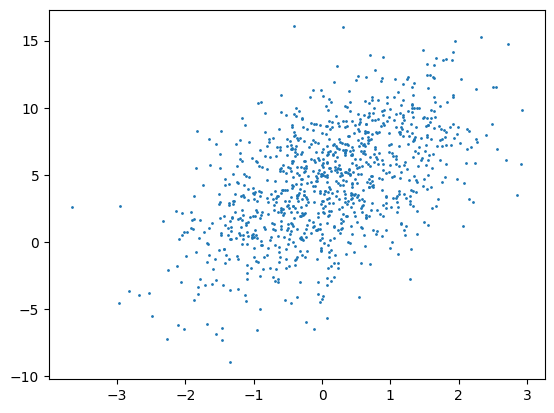

In [114]:
plt.scatter(features[:,(0)].detach(),labels.detach(),1)
plt.show()

In [51]:
import random

In [68]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices] , labels[batch_indices]

In [172]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)

tensor([[-0.2913,  0.9958],
        [ 1.1450, -0.9136],
        [-1.8147,  1.1485],
        [ 0.4190, -0.4330],
        [-0.3133, -0.3214],
        [-1.4944, -0.1748],
        [ 0.2602, -0.0472],
        [ 0.2654,  1.1960],
        [-0.7927,  0.8957],
        [ 0.5351, -0.5595]]) 
 tensor([[ 0.2336],
        [ 9.5942],
        [-3.3397],
        [ 6.5006],
        [ 4.6800],
        [ 1.8033],
        [ 4.8919],
        [ 0.6622],
        [-0.4335],
        [ 7.1624]])
tensor([[ 0.6064,  0.7874],
        [ 0.1671, -0.5871],
        [ 1.3365,  0.1631],
        [-1.3257,  0.1263],
        [-1.0765, -0.8105],
        [ 1.1654, -0.6963],
        [ 1.2437, -0.4689],
        [-0.8925,  0.1123],
        [ 1.2333,  1.0033],
        [-2.0239,  1.9494]]) 
 tensor([[ 2.7411],
        [ 6.5284],
        [ 6.3136],
        [ 1.1221],
        [ 4.8094],
        [ 8.8954],
        [ 8.2727],
        [ 2.0363],
        [ 3.2662],
        [-6.4640]])
tensor([[-1.5918,  0.8765],
        [-0.4187,  0.995

In [173]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
w,b

(tensor([[0.0046],
         [0.0076]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [71]:
def linreg(X,w,b):
    return torch.matmul(X,w) + b

In [72]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [73]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [170]:
lr = 0.03
num_epochs = 30
net = linreg
loss = squared_loss

In [174]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1} , loss {float(train_l.mean()):f}')
        print(f'now data w:{w} b:{b}')

epoch 1 , loss 0.024643
now data w:tensor([[ 1.9794],
        [-3.2709]], requires_grad=True) b:tensor([4.0268], requires_grad=True)
epoch 2 , loss 0.000093
now data w:tensor([[ 2.0011],
        [-3.3948]], requires_grad=True) b:tensor([4.1922], requires_grad=True)
epoch 3 , loss 0.000050
now data w:tensor([[ 2.0000],
        [-3.3993]], requires_grad=True) b:tensor([4.1996], requires_grad=True)
epoch 4 , loss 0.000050
now data w:tensor([[ 2.0000],
        [-3.3995]], requires_grad=True) b:tensor([4.1997], requires_grad=True)
epoch 5 , loss 0.000050
now data w:tensor([[ 2.0001],
        [-3.3998]], requires_grad=True) b:tensor([4.2003], requires_grad=True)
epoch 6 , loss 0.000050
now data w:tensor([[ 2.0000],
        [-3.3997]], requires_grad=True) b:tensor([4.2007], requires_grad=True)
epoch 7 , loss 0.000050
now data w:tensor([[ 1.9997],
        [-3.3994]], requires_grad=True) b:tensor([4.2002], requires_grad=True)
epoch 8 , loss 0.000050
now data w:tensor([[ 1.9998],
        [-3.399